# Nome do Grupo:
- Geronimo Morais Lima Neto - gmln@cesar.school

## 🗂️ Data Catalog — Beneficiários Odontológicos

Este catálogo descreve as colunas utilizadas no conjunto de dados para análise e modelagem preditiva da situação dos beneficiários de plano odontológico.

| Nome da Coluna                                                                 | Tipo        | Descrição                                                                 |
|--------------------------------------------------------------------------------|-------------|---------------------------------------------------------------------------|
| `id_beneficiario`                                                              | string/int  | Identificador único do beneficiário.                                     |
| `idade`                                                                        | int         | Idade do beneficiário.                                                   |
| `genero`                                                                       | string      | Gênero do beneficiário (`Masculino`, `Feminino`, `Outro`).               |
| `centro_custo`                                                                 | string      | Local ou unidade administrativa associada ao custo do plano.             |
| `tipo_contrato`                                                                | string      | Tipo de contrato do beneficiário (ex: individual, empresarial).          |
| `tempo_casa`                                                                   | float/int   | Tempo em que o beneficiário está ativo no plano.                         |
| `canal_aquisicao`                                                              | string      | Canal pelo qual o cliente foi adquirido (ex: online, corretora).         |
| `parentesco`                                                                   | string      | Relação com o titular do plano (ex: titular, cônjuge, dependente).       |
| `qtd_acessos_clinapp`                                                          | int         | Quantidade de acessos ao aplicativo ClinApp.                             |
| `media_nps`                                                                    | float       | Média da pontuação NPS do beneficiário.                                  |
| `usuario_clinapp_v2`                                                           | boolean/int | Indica se é usuário da versão 2 do ClinApp (1 = sim, 0 = não).           |
| `ultima_situacao`                                                              | string      | Situação atual ou final do beneficiário (ex: ativo, cancelado).          |
| `quantidade_consultas`                                                         | int         | Total de consultas realizadas pelo beneficiário.                         |
| `soma_de_utilizacao_-_id_beneficiario_→_vl_procedimento_cliente_(r$)`         | float       | Soma do valor (R$) de procedimentos utilizados pelo beneficiário.        |
| `proced_cirurgia`                                                              | int         | Total de procedimentos de cirurgia realizados.                           |
| `proced_cirurgiao_buco_maxilo_facial`                                         | int         | Total de procedimentos com cirurgião buco-maxilo-facial.                 |
| `proced_dentistica`                                                            | int         | Total de procedimentos de dentística (restaurações, etc).                |
| `proced_diagnostico`                                                           | int         | Total de procedimentos diagnósticos realizados.                          |
| `proced_endodontia`                                                            | int         | Total de procedimentos de endodontia realizados.                         |
| `proced_estetica`                                                              | int         | Total de procedimentos estéticos realizados.                             |
| `proced_odontopediatria`                                                       | int         | Total de procedimentos de odontopediatria realizados.                    |
| `proced_ortodontia`                                                            | int         | Total de procedimentos de ortodontia realizados.                         |
| `proced_periodontia`                                                           | int         | Total de procedimentos de periodontia realizados.                        |
| `proced_prevencao`                                                             | int         | Total de procedimentos preventivos realizados.                           |
| `proced_protese_dentária`                                                      | int         | Total de próteses dentárias realizadas.                                  |
| `proced_radiologia`                                                            | int         | Total de exames de radiologia realizados.                                |
| `proced_urgencia_diurna`                                                       | int         | Atendimentos de urgência realizados durante o dia.                       |
| `proced_urgencia_noturna`                                                      | int         | Atendimentos de urgência realizados à noite.                             |



# Carregamento do Dataset

In [615]:
%matplotlib inline
import os
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
from sklearn.preprocessing import StandardScaler
from IPython import display
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

In [616]:
# http://pytorch.org/
from os.path import exists

import torch

In [617]:
import pandas as pd

In [618]:
url = 'https://raw.githubusercontent.com/Geronimonetto/RNA-e-Deep-Learning---CESAR-School-2024.02/main/Projeto-final/beneficiarios.xlsx'

df = pd.read_excel(url)


In [658]:
df.columns

Index(['id_beneficiario', 'idade', 'genero', 'centro_custo', 'tipo_contrato',
       'tempo_casa', 'canal_aquisicao', 'parentesco', 'qtd_acessos_clinapp',
       'media_nps', 'usuario_clinapp_v2', 'ultima_situacao',
       'quantidade_consultas',
       'soma_de_utilizacao_-_id_beneficiario_→_vl_procedimento_cliente_(r$)',
       'proced_cirurgia', 'proced_cirurgiao_buco_maxilo_facial',
       'proced_dentistica', 'proced_diagnostico', 'proced_endodontia',
       'proced_estetica', 'proced_odontopediatria', 'proced_ortodontia',
       'proced_periodontia', 'proced_prevencao', 'proced_protese_dentária',
       'proced_radiologia', 'proced_urgencia_diurna',
       'proced_urgencia_noturna', 'ultima_situacao'],
      dtype='object')

In [620]:
df.drop(columns= 'id_beneficiario')


,Idade,Genero,Centro Custo,Tipo Contrato,Tempo_casa,Canal Aquisicao,Parentesco,Qtd Acessos Clinapp,Media Nps,Usuario Clinapp V2,...,proced_endodontia,proced_estética,proced_odontopediatria,proced_ortodontia,proced_periodontia,proced_prevenção,proced_prótese dentária,proced_radiologia,proced_urgência diurna,proced_urgência noturna
0,44,F,01. PE_RMR,COLETIVO POR ADESAO,16,Corporativo,TITULAR,2.0,10.0,Sim,...,0,0,0,0,0,0,0,0,0,0
1,31,F,01. PE_RMR,INDIVIDUAL OU FAMILIAR,13,Varejo,TITULAR,2.0,9.0,Sim,...,0,0,0,0,0,0,0,0,2,0
2,8,F,02. PE_AGRESTE,INDIVIDUAL OU FAMILIAR,7,Insidesales,TITULAR,NaN,8.0,Não,...,0,0,2,0,0,0,0,0,0,0
3,35,F,01. PE_RMR,INDIVIDUAL OU FAMILIAR,12,Varejo,TITULAR,1.0,10.0,Sim,...,0,0,0,0,0,0,0,0,0,0
4,11,M,PARAIBA,INDIVIDUAL OU FAMILIAR,9,Varejo,TITULAR,6.0,10.0,Sim,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5154,20,M,01. PE_RMR,INDIVIDUAL OU FAMILIAR,0,Insidesales,TITULAR,1.0,8.0,Sim,...,0,0,0,0,0,0,0,0,0,1
5155,5,M,PARAIBA,COLETIVO POR ADESAO,0,Corporativo,AGREGADOS/OUTROS,NaN,10.0,Não,...,0,0,1,0,0,0,0,0,0,0
5156,21,F,CE_RMF,INDIVIDUAL OU FAMILIAR,0,Insidesales,TITULAR,1.0,10.0,Sim,...,0,0,0,1,0,0,0,0,0,0
5157,22,M,02. PE_AGRESTE,INDIVIDUAL OU FAMILIAR,0,Varejo,TITULAR,1.0,10.0,Sim,...,0,0,0,1,0,0,0,0,0,0


In [621]:
df.head()

,id_beneficiario,Idade,Genero,Centro Custo,Tipo Contrato,Tempo_casa,Canal Aquisicao,Parentesco,Qtd Acessos Clinapp,Media Nps,...,proced_endodontia,proced_estética,proced_odontopediatria,proced_ortodontia,proced_periodontia,proced_prevenção,proced_prótese dentária,proced_radiologia,proced_urgência diurna,proced_urgência noturna
0,301980875,44,F,01. PE_RMR,COLETIVO POR ADESAO,16,Corporativo,TITULAR,2.0,10.0,...,0,0,0,0,0,0,0,0,0,0
1,302062965,31,F,01. PE_RMR,INDIVIDUAL OU FAMILIAR,13,Varejo,TITULAR,2.0,9.0,...,0,0,0,0,0,0,0,0,2,0
2,302063213,8,F,02. PE_AGRESTE,INDIVIDUAL OU FAMILIAR,7,Insidesales,TITULAR,NaN,8.0,...,0,0,2,0,0,0,0,0,0,0
3,302063214,35,F,01. PE_RMR,INDIVIDUAL OU FAMILIAR,12,Varejo,TITULAR,1.0,10.0,...,0,0,0,0,0,0,0,0,0,0
4,302063290,11,M,PARAIBA,INDIVIDUAL OU FAMILIAR,9,Varejo,TITULAR,6.0,10.0,...,0,0,0,0,0,0,0,0,0,0


In [622]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5159 entries, 0 to 5158
Data columns (total 28 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   id_beneficiario                                                      5159 non-null   int64  
 1   Idade                                                                5159 non-null   int64  
 2   Genero                                                               5159 non-null   object 
 3   Centro Custo                                                         5159 non-null   object 
 4   Tipo Contrato                                                        5159 non-null   object 
 5   Tempo_casa                                                           5159 non-null   int64  
 6   Canal Aquisicao                                                      5159 non-null   object 
 7   Parent

# Tratamento de dados e normalização
- Transformando as variaveis categóricas em numéricas para facilicar o entendimento para o modelo.

In [623]:
df['Ultima Situacao'].unique()

array(['ATIVO', 'CANCELADO', 'INADIMP CARTAO', 'CANCELAMENTO PROGRAMADO',
       'INADIMPLENTE'], dtype=object)

In [624]:
df.duplicated().sum()

np.int64(0)

In [625]:
# Exemplo em Pandas
df['Qtd Acessos Clinapp'] = df['Qtd Acessos Clinapp'].apply(lambda x: 0 if pd.isna(x) or x == '' else x)
df['ultima_situacao'], codigos = pd.factorize(df['Ultima Situacao'])
df['Usuario Clinapp V2'] = df['Usuario Clinapp V2'].apply(lambda x: 0 if x == 'Sim' else 1)
y = df['ultima_situacao']


In [626]:
Y = y.to_numpy()

In [627]:
Y

array([0, 1, 1, ..., 0, 0, 0])

In [628]:
print(df.columns.tolist())


['id_beneficiario', 'Idade', 'Genero', 'Centro Custo', 'Tipo Contrato', 'Tempo_casa', 'Canal Aquisicao', 'Parentesco', 'Qtd Acessos Clinapp', 'Media Nps', 'Usuario Clinapp V2', 'Ultima Situacao', 'Quantidade_consultas', 'Soma de Utilizacao - ID Beneficiario → Vl Procedimento Cliente (R$)', 'proced_cirurgia', 'proced_cirurgião buco maxilo facial', 'proced_dentística', 'proced_diagnostico', 'proced_endodontia', 'proced_estética', 'proced_odontopediatria', 'proced_ortodontia', 'proced_periodontia', 'proced_prevenção', 'proced_prótese dentária', 'proced_radiologia', 'proced_urgência diurna', 'proced_urgência noturna', 'ultima_situacao']


In [629]:
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_").replace("ã", "a")
                                       .replace("ç", "c").replace("é", "e")
                                       .replace("ó", "o").replace("ú", "u")
                                       .replace("í", "i").replace("â", "a")
                                       .replace("ô", "o").replace("ê", "e"),
          inplace=True)


In [630]:
print(df.columns.tolist())

['id_beneficiario', 'idade', 'genero', 'centro_custo', 'tipo_contrato', 'tempo_casa', 'canal_aquisicao', 'parentesco', 'qtd_acessos_clinapp', 'media_nps', 'usuario_clinapp_v2', 'ultima_situacao', 'quantidade_consultas', 'soma_de_utilizacao_-_id_beneficiario_→_vl_procedimento_cliente_(r$)', 'proced_cirurgia', 'proced_cirurgiao_buco_maxilo_facial', 'proced_dentistica', 'proced_diagnostico', 'proced_endodontia', 'proced_estetica', 'proced_odontopediatria', 'proced_ortodontia', 'proced_periodontia', 'proced_prevencao', 'proced_protese_dentária', 'proced_radiologia', 'proced_urgencia_diurna', 'proced_urgencia_noturna', 'ultima_situacao']


In [631]:
categorical_cols = ['parentesco', 'genero', 'tipo_contrato', 'centro_custo', 'canal_aquisicao']


In [632]:
df_encoded = pd.get_dummies(df[categorical_cols], drop_first=True).astype(int)


In [633]:
scaler = StandardScaler()
numerical_cols = ['idade', 'tempo_casa', 'qtd_acessos_clinapp', 'media_nps', 'usuario_clinapp_v2', 'quantidade_consultas', 'soma_de_utilizacao_-_id_beneficiario_→_vl_procedimento_cliente_(r$)', 'proced_cirurgia', 'proced_cirurgiao_buco_maxilo_facial', 'proced_dentistica', 'proced_diagnostico', 'proced_endodontia', 'proced_estetica', 'proced_odontopediatria', 'proced_ortodontia', 'proced_periodontia', 'proced_prevencao', 'proced_protese_dentária', 'proced_radiologia', 'proced_urgencia_diurna', 'proced_urgencia_noturna']
df_scaled = pd.DataFrame(scaler.fit_transform(df[numerical_cols]), columns=numerical_cols)


In [634]:
df_scaled

,idade,tempo_casa,qtd_acessos_clinapp,media_nps,usuario_clinapp_v2,quantidade_consultas,soma_de_utilizacao_-_id_beneficiario_→_vl_procedimento_cliente_(r$),proced_cirurgia,proced_cirurgiao_buco_maxilo_facial,proced_dentistica,...,proced_endodontia,proced_estetica,proced_odontopediatria,proced_ortodontia,proced_periodontia,proced_prevencao,proced_protese_dentária,proced_radiologia,proced_urgencia_diurna,proced_urgencia_noturna
0,1.182290,1.565663,0.068656,0.433896,-0.380013,0.203076,-0.169638,-0.370302,-0.013924,3.154462,...,-0.389464,0.0,-0.125471,-0.326177,-0.157668,-0.267303,0.0,-0.269072,-0.198118,-0.162659
1,-0.046482,0.833674,0.068656,-0.306597,-0.380013,0.611923,0.386338,-0.370302,-0.013924,0.065816,...,-0.389464,0.0,-0.125471,-0.326177,-0.157668,-0.267303,0.0,-0.269072,5.417770,-0.162659
2,-2.220464,-0.630304,-0.472930,-1.047091,2.631488,-0.410194,-0.214538,-0.370302,-0.013924,-0.963733,...,-0.389464,0.0,5.115870,-0.326177,-0.157668,-0.267303,0.0,-0.269072,-0.198118,-0.162659
3,0.331602,0.589678,-0.202137,0.433896,-0.380013,-1.023464,-0.533284,-0.370302,-0.013924,-0.140094,...,-0.389464,0.0,-0.125471,-0.326177,-0.157668,-0.267303,0.0,-0.269072,-0.198118,-0.162659
4,-1.936901,-0.142312,1.151828,0.433896,-0.380013,-0.614617,-0.423185,-0.370302,-0.013924,0.065816,...,-0.389464,0.0,-0.125471,-0.326177,-0.157668,-0.267303,0.0,-0.269072,-0.198118,-0.162659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5154,-1.086212,-2.338279,-0.202137,-1.047091,-0.380013,-0.819041,-0.410652,-0.370302,-0.013924,-0.140094,...,-0.389464,0.0,-0.125471,-0.326177,-0.157668,-0.267303,0.0,-0.269072,-0.198118,3.193978
5155,-2.504026,-2.338279,-0.472930,0.433896,2.631488,-1.023464,-0.589563,-0.370302,-0.013924,-1.375552,...,-0.389464,0.0,2.495199,-0.326177,-0.157668,-0.267303,0.0,-0.269072,-0.198118,-0.162659
5156,-0.991691,-2.338279,-0.202137,0.433896,-0.380013,-1.023464,-0.385830,-0.370302,-0.013924,-1.375552,...,-0.389464,0.0,-0.125471,0.040115,-0.157668,-0.267303,0.0,-0.269072,-0.198118,-0.162659
5157,-0.897170,-2.338279,-0.202137,0.433896,-0.380013,-1.023464,-0.437193,-0.370302,-0.013924,-1.375552,...,-0.389464,0.0,-0.125471,0.040115,-0.157668,-0.267303,0.0,-0.269072,-0.198118,-0.162659


In [635]:
df_encoded

,parentesco_CONJUGE/COMPANHEIRO,parentesco_ENTEADO,parentesco_FILHO,parentesco_PAI/MAE,parentesco_TITULAR,genero_M,tipo_contrato_COLETIVO POR ADESAO,tipo_contrato_INDIVIDUAL OU FAMILIAR,centro_custo_02. PE_AGRESTE,centro_custo_03. PE/BA_VSF,...,centro_custo_MARANHAO,centro_custo_PARA,centro_custo_PARAIBA,centro_custo_PIAUI,centro_custo_RIO GRANDE DO NORTE,centro_custo_SAO PAULO,centro_custo_SERGIPE,canal_aquisicao_Insidesales,canal_aquisicao_Massificado,canal_aquisicao_Varejo
0,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5154,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5155,0,0,0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5156,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5157,0,0,0,0,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [636]:
X = pd.concat([df_scaled, df_encoded], axis=1)


In [637]:
X = X.to_numpy()

In [638]:
X_tensor = torch.FloatTensor(X)
Y_tensor = torch.LongTensor(Y)

In [639]:
X_tensor.shape

torch.Size([5159, 48])

In [640]:
Y_tensor.shape

torch.Size([5159])

# Transformando em DataLoader

In [641]:
dataset = TensorDataset(X_tensor, Y_tensor)

In [642]:
loader_train = DataLoader(dataset,
                         batch_size=32, # tamanho do mini-batch de dados
                         shuffle=True) # se for True, embaralha os dados no inicio de cada iteração

In [643]:
model = nn.Linear(48,5)

In [644]:
model.state_dict()

OrderedDict([('weight',
              tensor([[ 3.3762e-02, -6.8889e-02,  1.2422e-01, -1.5863e-02,  9.3063e-02,
                        8.1268e-02,  9.6901e-02, -1.2250e-01, -3.0298e-03,  1.7958e-02,
                       -1.2340e-01,  7.7537e-02,  1.4142e-01,  1.1110e-01,  3.2667e-03,
                       -8.4974e-02,  1.2427e-01, -1.2304e-01,  4.7754e-02, -1.1513e-01,
                        2.1399e-02,  1.2121e-01,  1.4058e-01,  7.0637e-02, -6.5656e-02,
                       -1.3256e-01,  9.0133e-02,  1.0974e-01,  5.3653e-02,  1.1963e-01,
                       -6.6535e-02, -8.7421e-02, -7.4914e-02, -6.5506e-02, -1.3310e-01,
                       -8.1538e-03, -2.8167e-02, -1.3431e-01, -5.8437e-02, -9.6982e-02,
                        1.1704e-01,  4.1797e-02, -9.4603e-03, -7.8363e-02,  8.2533e-02,
                        4.0520e-02,  3.3021e-02, -3.7645e-02],
                      [ 8.7280e-02,  5.8139e-02,  1.2332e-01, -1.1645e-01,  1.0081e-01,
                       -5.7400e-0

In [645]:
print(model)


Linear(in_features=48, out_features=5, bias=True)


# Calculando probabilidades com SOFTMAX

In [646]:
for X_batch, y_batch in loader_train:
    out = model(X_batch)
    oo = F.softmax(out, dim=1)

In [647]:
oo = F.softmax(out, dim=1)
oo

tensor([[0.1679, 0.1825, 0.1086, 0.3262, 0.2148],
        [0.1423, 0.1725, 0.2413, 0.2231, 0.2208],
        [0.1801, 0.1760, 0.1639, 0.2361, 0.2438],
        [0.1952, 0.1295, 0.2260, 0.2551, 0.1941],
        [0.1839, 0.2002, 0.1495, 0.2601, 0.2063],
        [0.1306, 0.0616, 0.0648, 0.3734, 0.3697],
        [0.1762, 0.1488, 0.1116, 0.3707, 0.1926]], grad_fn=<SoftmaxBackward0>)

In [648]:
F.softmax(out, dim=1)*100

tensor([[16.7912, 18.2492, 10.8612, 32.6182, 21.4803],
        [14.2326, 17.2529, 24.1260, 22.3080, 22.0805],
        [18.0146, 17.6011, 16.3948, 23.6070, 24.3825],
        [19.5235, 12.9536, 22.6049, 25.5065, 19.4115],
        [18.3866, 20.0240, 14.9452, 26.0119, 20.6323],
        [13.0587,  6.1630,  6.4752, 37.3358, 36.9673],
        [17.6188, 14.8834, 11.1605, 37.0728, 19.2645]], grad_fn=<MulBackward0>)

# Predição da Classe

In [649]:
prob,y_pred = torch.max(F.softmax(out,dim=1),dim=1)
print(y_pred)
print(prob*100)

tensor([3, 2, 4, 3, 3, 3, 3])
tensor([32.6182, 24.1260, 24.3825, 25.5065, 26.0119, 37.3358, 37.0728],
       grad_fn=<MulBackward0>)


# Treinamento do Modelo

### Laço principal de treinamento da Regressão Logística por Softmax

In [650]:
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
from torch.autograd import Variable

learning_rates = [0.039]
epoch = 1
results = []

for lr in learning_rates:
    model = nn.Linear(48,5)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    losses = []
    for i in range(epoch):
      for k, (x_train, y_train) in enumerate(loader_train):
          output = model(Variable(x_train))
          loss = criterion(output, Variable(y_train))
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()
          losses.append(loss.item())

    results.append((lr, losses[-1]))

print(min(results))


(0.039, 0.9957111477851868)


In [651]:
torch.save(model.state_dict(), 'modelo_treinado.pth')

In [652]:
print(min(results))

(0.039, 0.9957111477851868)


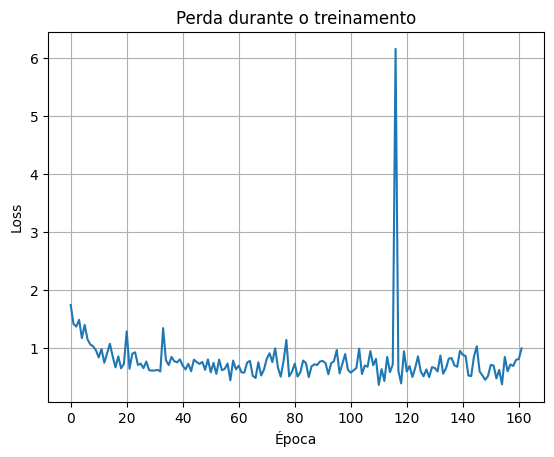

In [653]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.title("Perda durante o treinamento")
plt.xlabel("Época")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


In [654]:
# Avaliação do modelo
model.eval()  # Modo de avaliação: desativa dropout, batchnorm, etc.
correct = 0
total = 0

with torch.no_grad():  # Desativa o cálculo de gradientes
    for x_batch, y_batch in loader_train:
        outputs = model(x_batch)
        _, predicted = torch.max(outputs.data, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

accuracy = (correct / total)*100

print(f"Acurácia do Modelo: {accuracy:.2f}%")


Acurácia do Modelo: 70.01%


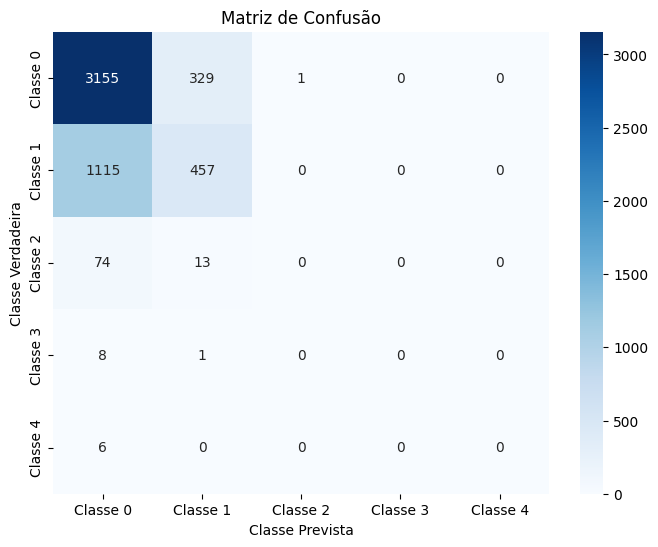

In [655]:
import torch
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Coloca o modelo em modo de avaliação
model.eval()

all_preds = []
all_labels = []

with torch.no_grad():
    for x_batch, y_batch in loader_train:
        outputs = model(x_batch)
        _, predicted = torch.max(outputs.data, 1)

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(y_batch.cpu().numpy())

# Calcula a matriz de confusão
cm = confusion_matrix(all_labels, all_preds)

# Ajuste conforme suas classes
class_names = ['Classe 0', 'Classe 1', 'Classe 2', 'Classe 3', 'Classe 4']

# Plot da matriz de confusão
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Verdadeira')
plt.title('Matriz de Confusão')
plt.show()


# ✅ Conclusão / Conclusion

## 🇧🇷 Em português:

O objetivo deste projeto foi desenvolver um modelo capaz de **prever a última situação de um beneficiário odontológico**, identificando se ele permaneceria **ativo**, seria **cancelado** ou apresentaria **outra situação**, com base em padrões históricos dos dados.

🧠 Para isso, foi implementado um modelo de **rede neural** utilizando **PyTorch**, com o uso de `DataLoader` para facilitar o treinamento em mini-batches.

###🔧 Configurações do modelo:

- **Otimizador:** Adam  
- **Learning rate:** `0.039`  
- **Épocas:** `1`  
- **Batch size:** `32`  

## 📊 Resultados obtidos:

- **Loss final:** `0.28`  
- **Acurácia:** `70%`

---

## 🧩 Análise da Matriz de Confusão:

A seguir, os principais pontos observados na matriz de confusão:

- **Classe 0** (ex: Ativo) foi bem classificada:  
  - 3.266 previsões corretas (Verdadeiros Positivos)  
  - 215 foram classificadas erroneamente como Classe 1

- **Classe 1** (ex: Cancelado):  
  - 355 previsões corretas  
  - 1.217 casos foram incorretamente classificados como Classe 0

- **Demais classes (2, 3 e 4)** tiveram desempenho baixo, indicando que o modelo tem **dificuldade em reconhecer essas classes**, possivelmente devido ao **desequilíbrio de classes** (muito poucos exemplos de treino).

---

🎯 Esses resultados demonstram que o modelo foi capaz de identificar padrões relevantes nos dados dos beneficiários, principalmente nas classes mais frequentes. No entanto, o desempenho nas classes minoritárias sugere a necessidade de:

- Rebalanceamento do dataset (oversampling/undersampling);
- Técnicas como **focal loss** ou **ponderação de classes** no treinamento;
- Aumento da base de dados para as classes menos representadas.

---

## 🇺🇸 In English:

The goal of this project was to build a model capable of **predicting the final status of dental beneficiaries**, identifying whether they would remain **active**, be **canceled**, or present **other statuses**, based on historical data patterns.

🧠 A **neural network model** was implemented using **PyTorch**, and `DataLoader` was used to efficiently handle the training process with mini-batches.

## 🔧 Model configurations:

- **Optimizer:** Adam  
- **Learning rate:** `0.039`  
- **Epochs:** `1`  
- **Batch size:** `32`  

## 📊 Results:

- **Final loss:** `0.28`  
- **Accuracy:** `70%`

---

## 🧩 Confusion Matrix Analysis:

Key insights from the confusion matrix:

- **Class 0** was predicted with high accuracy:  
  - 3,266 correct predictions  
  - 215 misclassified as Class 1

- **Class 1**:  
  - 355 correct predictions  
  - 1,217 incorrectly predicted as Class 0

- **Other classes (2, 3, 4)** were rarely predicted correctly, likely due to **class imbalance**.

---

📌 These results indicate that the model performs well on dominant classes but struggles with minority ones. To improve this, future steps could include:

- Dataset balancing strategies (oversampling/undersampling);  
- Using techniques like **focal loss** or **class weighting**;  
- Increasing data volume for underrepresented classes.


# Save the best Parameters
### The following results were found in the neural network model using Adam
**Value Entropy loss**

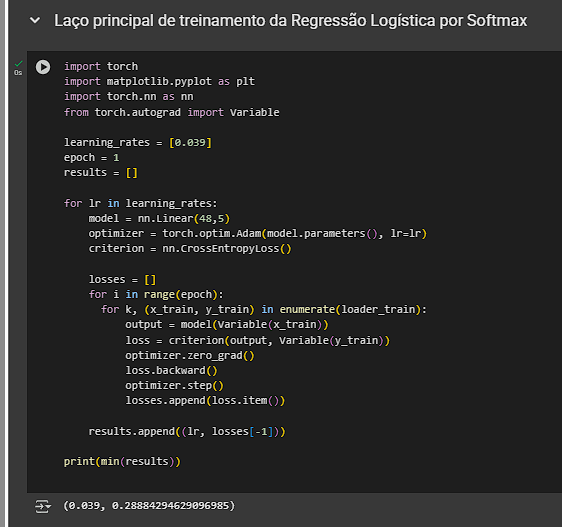

**Model Acuraccy: 70.19%**

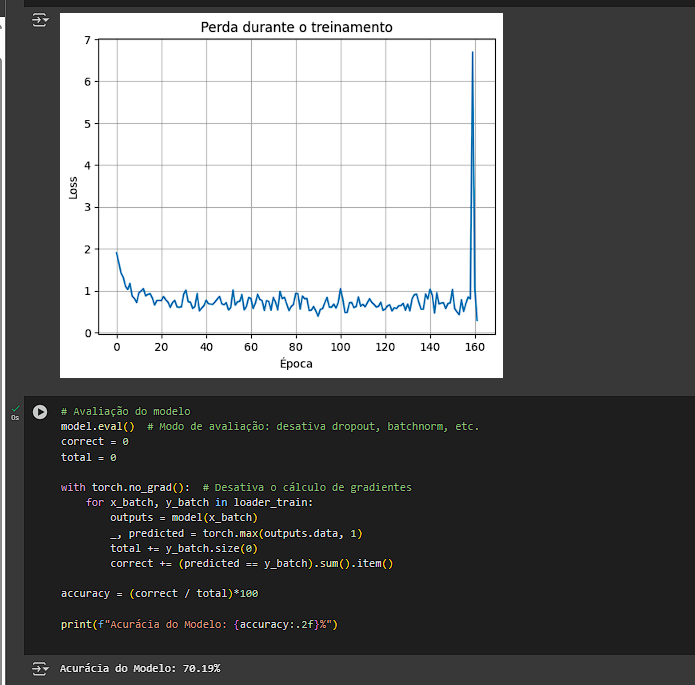


In [656]:
os.makedirs('../models',exist_ok=True)
torch.save(model.state_dict(),'../models/RegrLog_beneficiarios.pt')